<h1>CA3 Data Science Tutorial</h1>
Kevin Quinn
C00216607

<h3>Introduction</h3>
The purpose of this notebook tutorial is to provide incoming 4th year students enrolled on the Data Science module a technical understanding of data science and machine learning. In this tutorial this will be done with an example of use with a Convolutional Neural Network and a normal Neural Network, which is used in imagery analysis which is a prominent area of data science and machine learning currently.

<h3>Exclaimer</h3>
This notebook tutorial is divised in a way that it is efficent with the use of a GPU, if you have no GPU and you notice that the machine learning is taking time reduce the IMG_SIZE variable and the epochs variable.

<h3>Learning Outcomes</h3>
Following completion of this tutorial, the user will have an understanding of the following within the tensorflow framework,
<ul>
  <li>Data Import</li>
  <li>Data Preporation / Processing</li>
  <li>Model Creation</li>
  <li>Model Training</li>
  <li>Model Testing</li>
  <li>Model Predictions</li>
</ul>
This tutorial will be done using a variety of packages but the main framework will be tensorflow along with open computer vision.

<h3>Tutorial Explanation</h3>
With this tutorial we will be covering to examples of uses for Convolutional Neural Networks and Neural Networks,
<ul>
  <li>Binary Image Classification</li>
  <li>Multi Image Classification</li>
</ul>
The terms are pretty self explanitory, but Binary Image Classification being the model will only classify the image into 2 catogories, and Multi Image Classification into more than two. They are two variations of the same process but as with Binary only classifying into 2 catogories it has the potential to be more accuarate in its prediction i.e. its 50% chance its correct on a complete uneducated guess.

With these two uses we will have two different sets of data,
<ul>
  <li>Cats and Dogs Dataset</li>
  <li>Clothing Dataset</li>
</ul>
As can be imagined the cats and dogs will be used with the Binary Classification, i.e. we provide a picture of a cat or dog and the model will provide a result to weather it thinks its a cat or dog. Where as the clothing datset will be used with the Multi Classification, so we will provide an image of clothing to the model and it will classify it to a type.

Due to the simplicity of the data being used in the clothing dataset a CNN does not need to be used but since the cats and dogs images contain so much background noise and are alot more complex this is why the CNN has to be used.

And Following all this I will show you how the same knowledge you learned from this tutorial can be applied to other datasets by applying the same technique we used with the clothing dataset but instead to another dataset, which is that of hand written numbers and digits which we will classify.

<h3>Outside Materials "Refrences"</h3>
<ul>
  <li>https://www.tensorflow.org/tutorials/images/classification</li>
  <li>https://www.tensorflow.org/tutorials/keras/classification</li>
  <li>https://www.pyimagesearch.com/2018/12/31/keras-conv2d-and-convolutional-layers/</li>
  <li>https://towardsdatascience.com/exploring-activation-functions-for-neural-networks-73498da59b02</li>
  <li>https://towardsdatascience.com/a-guide-to-neural-network-layers-with-applications-in-keras-40ccb7ebb57a</li>
  <li>https://medium.com/@hunterheidenreich/understanding-keras-dense-layers-2abadff9b990</li>
</ul>

<h3>Video Explanation of Convolutional Neural Networks</h3>
https://www.youtube.com/watch?v=YRhxdVk_sIs

<h3>Packages Needed</h3>
<ul>
  <li>Tensorflow Framework</li>
  <li>Keras from Tensorflow</li>
  <li>Keras models in which we are using a Sequential Model</li>
  <li>Keras layers in which we are using a variety of layers</li>
  <li>Keras image data generater</li>
  <li>OS which allows the script to preform operations on the system</li>
  <li>Open Computer Vision</li>
  <li>NumPy used to preform different operation on numerical data</li>
  <li>Matplotlib which is a data visualation library</li>
</ul>

In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Helper libraries
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import image

print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

Num GPUs Available:  1


<h3>Data Importation</h3>
With this next block of code we are going to import our 2 datasets, the first being the Cats and Dogs dataset which we will import from an external URL, and the second being the Clothing dataset which is pre imported along with tensorflow.

<h4>Cats and Dogs Importation</h4>

In [2]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'

path_to_zip = tf.keras.utils.get_file('cats_and_dogs.zip', origin=_URL, extract=True)

PATH = os.path.join(os.path.dirname(path_to_zip), 'cats_and_dogs_filtered')

Running this you will see that the dataset is downloaded from the given URL, this can be done with any online stored dataset which has public access by just providing the URL.

But you can also bring the dataset in from your local machine but that will not be covered in this turtorial.

With the next code we will be applying the directories in which the various images in them to variables. This includes first the training set of images which is used to then train the model, and then the test set of images which is then used to test the accuaracy of our model

In [3]:
cats_dogs_train_dir = os.path.join(PATH, 'train')
cats_dogs_test_dir = os.path.join(PATH, 'validation')

train_cats_dir = os.path.join(cats_dogs_train_dir, 'cats')
train_dogs_dir = os.path.join(cats_dogs_train_dir, 'dogs')
test_cats_dir = os.path.join(cats_dogs_test_dir, 'cats')  
test_dogs_dir = os.path.join(cats_dogs_test_dir, 'dogs')  

<h4>Clothing Importation</h4>

In [4]:
fashion_mnist = keras.datasets.fashion_mnist

(clothing_train_images, clothing_train_labels), (clothing_test_images, clothing_test_labels) = fashion_mnist.load_data()

clothing_class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

As you can see the above code has imported the dataset has first been assigned to a variable and then using the load data function which return four numpy arrays we have loaded the data into its corresponding training and testing sets just like we did with the Cats and Dogs but alot quicker this time as this dataset is built into the Tensorflow Framework.

You can also see we have a set with the accompanying labels for each image, the labels are stored in the form of a number, with each number representing a label. In this case,

<ul>
    <li>0 : T-shirt/top</li>
    <li>1 : Trousers</li>
    <li>2 : Pullover</li>
    <li>3 : Dress</li>
    <li>4 : Coat</li>
    <li>5 : Sandal</li>
    <li>6 : Shirt</li>
    <li>7 : Sneaker</li>
    <li>8 : Bag</li>
    <li>9 : Ankle Boot</li>
</ul>

<h3>Exploring The Data</h3>
With having your dataset it is important to understand what your working with, this included looking at the size of your data to see if its viable for training, looking if one class has more images than another as this can biased your model and many other reasons which would influence your way of working with the data

<h4>Cats and Dogs Dataset</h4>

In [5]:
print('Number of Cat Training Images:', len(os.listdir(train_cats_dir)))
print('Number of Dog Training Images:', len(os.listdir(train_dogs_dir)))

print('Number of Cat Testing Images:', len(os.listdir(test_cats_dir)))
print('Number of Dog Testing Images:', len(os.listdir(test_dogs_dir)))
print("--")
print("Total training images:", len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir)))
print("Total testing images:", len(os.listdir(test_cats_dir)) +len(os.listdir(test_dogs_dir)))

Number of Cat Training Images: 1000
Number of Dog Training Images: 1000
Number of Cat Testing Images: 500
Number of Dog Testing Images: 500
--
Total training images: 2000
Total testing images: 1000


With this we can see that we have a total of 2000 training images which in terms of machine learning and datascience is quite small which suits well for this tutorial as you will not be waiting long periods of time for data to be loaded.

You can also notice that the training images have an equal amount so our model will not be biased.

Also you can see that the amount of testing images is half that of the training images which is the recommended amount for viable and accurate testing.

<h4>Clothing Dataset</h4>

In [6]:

print("Total Clothing training images:", len(clothing_train_labels))
print("Total Clothing testing images:", len(clothing_test_labels))

Total Clothing training images: 60000
Total Clothing testing images: 10000


With these results the first thing we will notice is that there are alot more images than in the Cats and Dogs dataset, this is due to it being Multi Classification and needing more images. 

You can also notice that we have far fewer images than the Cats and Dogs for testing than the half to half ratio, this is due to the larger amount of data and the multi classification which means we dont need as much testing as 10000 tesing images is enough to assess the model.

<h3>Data Preparation</h3>
<h4>Cats and Dogs Dataset</h4>

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


63

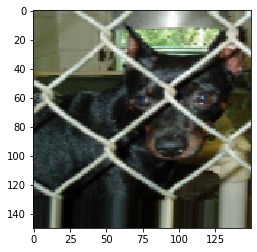

In [7]:
IMG_SIZE = 150
BATCH_SIZE = 32
epochs = 60


cats_dogs_train_image_generator = ImageDataGenerator(rescale=1./255,
                                                    rotation_range=45,
                                                    width_shift_range=.15,
                                                    height_shift_range=.15,
                                                    horizontal_flip=True,
                                                    zoom_range=0.5) 
cats_dogs_testing_image_generator = ImageDataGenerator(rescale=1./255)

cats_dogs_train_data = cats_dogs_train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory=cats_dogs_train_dir,
                                                           shuffle=True,
                                                           target_size=(IMG_SIZE, IMG_SIZE),
                                                           class_mode='binary')
cats_dogs_test_data = cats_dogs_testing_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory=cats_dogs_test_dir,
                                                              target_size=(IMG_SIZE, IMG_SIZE),
                                                              class_mode='binary')
sample_training_images, _ = next(cats_dogs_train_data)

plt.imshow(sample_training_images[0])

len(cats_dogs_train_data)

So with our Cats and Dogs Dataset we have to do it a small bit differently than the clothing, as since the clothing was imported straight from the framework it comes pre loaded into Numpy Arrays of Data, where as we have just loaded in the Directory of the Cats and Dogs.

<h5>Image Generators</h5>
But with this code we first make two image data generators which allows us to load in and process the images at the same time !

<h5>Image Sizing</h5>
So you can see first we are setting a size for the image, this will be used throughout the tutorial. We set it to 150 which is just big enough to provide a decent picture to train the model on. By doing this we are reducing the amount of processing needed as the image is smaller.

<h5>Batch Sizing</h5>
The batch size sets how many images we want to bring in per batch when loading the images, due to the low size of our dataset a small enough batch size of 32 has been chosen as it will allow the model to train more accuratley from the few images we have.

<h5>Image Data Values</h5>
We also set the rescale value in the Generator to rescale the data values to between 1 and 0 instead of 0 and 255 which is the RGB values, this is again done to decrease loading times but also make the model more accurate as the Convolutional Neaural Network, and many other machine learning algorithms in general are better and more accurate with smaller inputs. So where inputs can be scaled to something smaller without loosing value in the data it should be done so.

<h5>Image Augmentation to Help Prevent OverFitting</h5>
Using various different augmentation techniques on the training images helps to remove unwanted noise and details from the training images making them better for training with out neural network. We apply various different augmentations here such as flips, rotations and zooms in an effort to reduce overfitting in the model training.

<h5>flow_from_directory Method</h5>
In the flow_from_directory method you can see we provide a batch size which is how many images it will load in one go at a time. We provide the directory path in which the images need to be loaded from. By setting shuffle to through it means it will shuffle the order of the images as it stores them. This is done to prevent a biased in the model which can be caused if you train the model on just Cats first when it comes to the Dogs you are going to train it to just recognize Dogs then, so by shuffling it, it removes that biased from occuring. We then provide our image size and the we provide that it is a binary class as we only have our 2 classes Cats and Dogs.

<h5>Image Visualisation</h5>
Also using Mathplotlib we are able to print out an example of what the image looks like after it has been loaded in.

<h4>Clothing Dataset</h4>

Clothing Training Images Shape :  (28, 28)


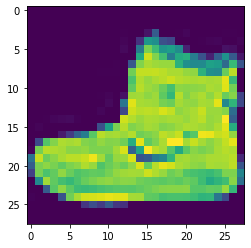

In [8]:
clothing_train_images = clothing_train_images / 255
clothing_test_images = clothing_test_images / 255

print("Clothing Training Images Shape : " , clothing_train_images[0].shape) 
plt.imshow(clothing_train_images[0])

With the clothing dataset you can see it has already been pre processed for us meaning all images have been sized downto 28 x 28 pixels as this is the smallest enough we can go and still have the image recognizeable meaning that even though we have more images in this dataset it should process just as quick as the Cats and Dogs Dataset.

The only processing we have to do which we also done with the Cats and Dogs Dataset is scalling the image value to a 0 or 1 by deviding by 255.

<h3>Model Creation</h3>
<h4>Cats and Dogs Dataset</h4>

In [9]:
cats_dogs_model = Sequential([
    Conv2D(16, 3, padding='same', activation='relu', input_shape=(IMG_SIZE, IMG_SIZE ,3)),
    MaxPooling2D(),
    Dropout(0.2),
    
    Conv2D(32, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    
    Conv2D(64, 3, padding='same', activation='relu'),
    MaxPooling2D(),
    Dropout(0.2),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    
    Dense(1),
])

<h5>Model Selection</h5>
So with this tutorial and with most basic practices with Neural Networks and Convolutional Neural Networks, you will use a Sequential Model. This means that the layers that are added to the model are passed through sequentially from first to last. This in general is the most used model.

<h5>Conv2D Layer</h5>
As we are creating a convolutional neaural network with 2D images we will mostly be using a few Conv2D layers within our model. 

<img src="https://miro.medium.com/max/1052/1*ZCjPUFrB6eHPRi4eyP6aaA.gif" alt="connect to internet to view image"/>


The first parameter we are specifying in the layers is the number of filters to be used on the layer. This is chosen based on the complexity of the dataset you are working with. So in this example we start with 16 filters and as you can see the number doubles with each layer. This is common practice as each Conv2D layer learns more filters from the past layer meaning it is getting deeper and deeper into the learning. So due to this being very simple data we only have 3 layers which we start with 16 filters and end with 64. If you were using more complex images you could go even deeper with the amount of layers and filters to learn more about your image.

<img src="https://www.pyimagesearch.com/wp-content/uploads/2018/12/keras_conv2d_num_filters.png" alt="connect to internet to view image"/>

With the filters after each Conv2D layer we use a MaxPooling2D layer to reduce the spatial dimmesions of the output again keeping our data smaller more accurate throughout the training of the model.

<img src="https://miro.medium.com/max/628/1*YHV4_XGJwSG_ZCl8w_qqMg.png" alt="connect to internet to view image"/>

The second paramameter we provide is the kernal size. Think of this as breaking the image up into a grid with your kernal size setting the size of the square grid i.e. 3x3 grid. Again this number is dependent on the complexity of our images and size and so on.If our images were larger than 150x150 pixels we might consider a grid greater than 3. With our images being simple a 3x3 grid will sufice but if images get more complex or bigger you could use even bigger such as 7x7 or more.

<img src="https://www.pyimagesearch.com/wp-content/uploads/2018/12/keras_conv2d_filter_size.png" alt="connect to internet to view image"/>

The third parameter in which we provide is the padding parameter. It can be set to one of two values, valid or same. During convolution with the padding parameter set to valid, spatial dimenstions are reduced through each layer meaning we are loosing some data through convolution on each layer. In some cases this is okay or even necceassary but in majority including this example it is not. So when we set the parameter to same, the spatial dimensions are preserved through each convolutional layer. Instead like we discussed to reduce the spatial dimesions in a better way we use the MaxPooling2D function.

<img src="https://s3-us-west-2.amazonaws.com/static.pyimagesearch.com/keras-conv2d/keras_conv2d_padding.gif" alt="connect to internet to view image"/>

The fourth parameter we provide is the activation function. The activation function is used on the layer during training to change the type of value loss and accuracy by changing how the layer reacts to the data in which it encounters. The three main activation functions are, Sigmoid, Tanh and Relu. Relu is the most commonly used but again you can try the various to see which makes the model most accurate. The Relu activation function's gradient is always equal to one meaning the maximum amount of an error can be passed through the network and layers meaning it can learn more from its mistakes making it more accurate. This again is the most common used function due to this benifit.

<img src="https://www.pyimagesearch.com/wp-content/uploads/2018/12/keras_conv2d_activation_functions.png" alt="connect to internet to view image"/>

And the final parameter you will see on the first Conv2D layer is the input shape parameter. Here you will pass in the size of the image in which the model should expect so in the dogs and cats this is 150x150 pixels. This means that the model will only accept images of this shape meaning all learning from data is equal and no chance for biased.

<h5>Dropout Layer</h5>
The dropout layer is used to help prevent overfitting in a model. Overfitting is where a model in this case will learn from unwanted noise or details from our training set. This will show if you look at our validation loss is alot higher overtime than our training loss. What the dropout layer does is it regularizes the neurons in the applied layer. So by us inputing two drop out layers with 0.2 it means that it will randomly drop 20% of the neurons back to 0 forcing the model to to work past the unwanted noise and details. This will show along with other overfitting prevention techniques if the validation accuracy and training accuracy are in around the same overtime, along with the validation loss and training loss being around the same overtime, which can be seen on the graph bellow following training.

<h5>Flatten Layer</h5>
With our Conv2D layer and data outputting multidimensional data, we can use the Flatten layer to flatten this data. This eccentially means the the multidemntial data is flattened into 1 dimensional making it more understandable and readable by the next Dense layer. E.g. our 150x150 sized image would become 22500-number long vector after the Flatten layer being applied.

<h5>Dense Layer</h5>
The purpose of the dense layers at the end is to provide a fully connected layer from the Conv2D and Flatten layers to the output layer. In this layer we provide 512 units as the first parameter and we see again the use of the Relu activation function. The units parameter is the most basic and fundamental parameter of the layer. It dictates the size of the bias vector and weight matrix which are all complicated terms in which we dont need to understand. The second Dense layer of just 1 unit is set that way for out output layer, we have only 2 output classes, Dogs and Cats. So the output layer is set to 1 for our Binaray Classification

<h4>Clothing Dataset</h4>

In [10]:
clothing_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    
    Dense(10),
])

As can be seen in the model creation of the model for the clothing dataset it alot more simpler. This is due to the low complexity of each image, only being of size 28x28 pixels and being a definites shape. So for this we do not even have to use a concolutional neural network as can be seen with the lack of Conv2D layers.

Instead what is happening here is we are first flattening the data from being multidimesional to a single number of type long integer and since it is the first layer we are providing the input shape parameter in which will set the size of the data in which the model will accept for training and use just the same as the first layer in the Cats and Dogs model.

Following this we use a Dropout layer like we did in the cats and dogs model to prevent overfitting which will be seen in the graphs bellow.

We then again see that we have 2 Dense layers the first containing 128 neurons, or units using the Relu activation rule. And then the second dense layer which has 10 units which is our 10 output classes for the output layer.

The reason this is so much simpler is due to the low complexity nature of the clothing dataset. It contains many types of clothing and each image has no background noise and thus can easily be interpreted by the model compared to the dogs and cats dataset

<h3>Compiling and Training the Model</h3>
<h4>Cats and Dogs Dataset</h4>

In [11]:
cats_dogs_model.compile(optimizer='adam',
              loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

cats_dogs_history = cats_dogs_model.fit(
    cats_dogs_train_data,
    steps_per_epoch=(len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))) / BATCH_SIZE,
    epochs=epochs,
    validation_data=cats_dogs_test_data,
    validation_steps=(len(os.listdir(test_cats_dir)) + len(os.listdir(test_dogs_dir))) / BATCH_SIZE
)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 62.5 steps, validate for 31.25 steps
Epoch 1/60
63/62 [==============================] - 14s 217ms/step - loss: 0.7903 - accuracy: 0.5035 - val_loss: 0.7088 - val_accuracy: 0.5000
Epoch 2/60
63/62 [==============================] - 13s 206ms/step - loss: 0.6871 - accuracy: 0.5120 - val_loss: 0.6857 - val_accuracy: 0.5460
Epoch 3/60
63/62 [==============================] - 13s 206ms/step - loss: 0.6658 - accuracy: 0.5485 - val_loss: 0.6693 - val_accuracy: 0.5600
Epoch 4/60
63/62 [==============================] - 13s 205ms/step - loss: 0.6507 - accuracy: 0.5890 - val_loss: 0.6618 - val_accuracy: 0.5700
Epoch 5/60
63/62 [==============================] - 14s 216ms/step - loss: 0.6344 - accuracy: 0.6080 - val_loss: 0.6496 - val_accuracy: 0.6020
Epoch 6/60
63/62 [==============================] - 13s 206ms/step - loss: 0.6353 - accuracy: 0.6065 - val_loss: 0.6231 - val_accuracy: 0.6240
Epoch 7/60
63/62 [===========================

63/62 [==============================] - 13s 203ms/step - loss: 0.4730 - accuracy: 0.7615 - val_loss: 0.5155 - val_accuracy: 0.7230
Epoch 57/60
63/62 [==============================] - 13s 208ms/step - loss: 0.4658 - accuracy: 0.7710 - val_loss: 0.4881 - val_accuracy: 0.7630
Epoch 58/60
63/62 [==============================] - 13s 204ms/step - loss: 0.4624 - accuracy: 0.7575 - val_loss: 0.4923 - val_accuracy: 0.7790
Epoch 59/60
63/62 [==============================] - 13s 205ms/step - loss: 0.4750 - accuracy: 0.7505 - val_loss: 0.4682 - val_accuracy: 0.7800
Epoch 60/60
63/62 [==============================] - 13s 207ms/step - loss: 0.4639 - accuracy: 0.7680 - val_loss: 0.4869 - val_accuracy: 0.7770


<h4>Compile Model</h4>
So with the compile model method you can see we are providing 3 paramters. First we have got the opimizer, for this there are many that you can use but the most commonly used is Adam. Adam is used due to its low memory requirents during model training and also little tuning to be effective during training.

Next we have the loss algorithm. This is what the model uses to idenify the error in itself and how to proceed with the next epoch in training itself. In this case using BinaryCrossentropy is the go to as we are dealing with binary classification, so this loss function will yield the best results for us.

And finally we provide the metrics we want to see, in this case its accuracy as it will more than likily be in every case. This shows us the model accuracy throughout the training process.

<h4>Model Fitting / Training</h4>
So it pretty self explanitory this is where we provide our training set and validation set to be used to tain our model. It is important to know that you can train the model <b>Without</b> a validation set, just that its better to have it so that you have an unbiased way to really see the true accuracy of your model.

First we provide the amount of steps per epoch for the training data. We do this by adding the total lengths of the training sets and then dividing by our batch size of 32 since we loaded the data in in batches.

We then provide the amount of epochs in which we want to train our model with an epoch is essentially a repetition of training, doing this can provide a more accurate model, but in some cases with too many epochs it can cause overfitting, which is a biased in our model which will show as near 100% accuracy meaning the model is basically inaccurate. In this case 60 epochs seemed to make the more accurate model but this can change depending on your data and essesntially requires trial and error to find the sweet spot.

Finally we then provide the amount of steps for the valaditon set which is done by again getting its length and dividing it by 32 our batch size.

<h4>Viewing the Progress Output</h4>
You can view the progress of each epoch as it is trained seeing what its initial accuracy is compared to the end. This is one of the ways to gain insight onto how you will need to tweak your model to make it more accurate. From viewing our below you can see our accuracy on both validation and training begins to slow after around 30 epochs at around 70%. But sinse the values between validation accuracy and loss are around the same as training accuracy and loss, this shows that we have prevented over fitting in our model. Meaning that the on average 75% accuracy achived with 60 epochs is a true representation of the models ability.


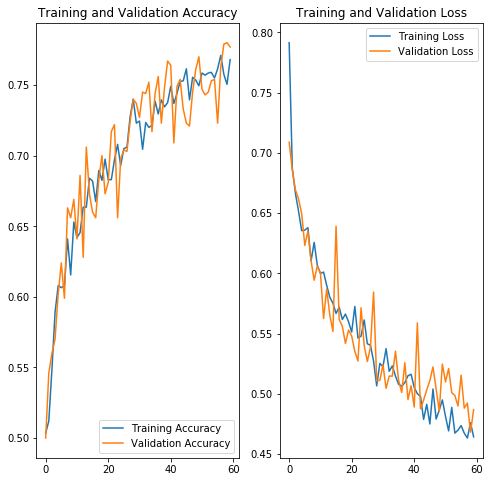

In [12]:
acc = cats_dogs_history.history['accuracy']
val_acc = cats_dogs_history.history['val_accuracy']

loss=cats_dogs_history.history['loss']
val_loss=cats_dogs_history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4>Clothing Dataset</h4>
<h4>Compiling The Model</h4>
Compared to when we were compiling the model for the cats and dogs dataset you can see that there is only one change when compiling the model. This is that we are using a different loss algorithm. Since with this model we are preforming multiple classification we can no more use the BinaryCrossentropy loss algorithm and instead replaced it with its counter part for multiple classification SparseCategoricalCrossentropy.

In [13]:
clothing_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

<h4>Training The Model</h4>
Further more with training the model again you can see this looks alot simpler compared to the cats and dogs training. Since we dont have our training data and labels as one variable we must input them as seen below. Also due to the simplicity and size of the data we are working with 10 epochs is more than enough and the model can work very quick with this. Further more with the validation data, the input for the parameter needs to be a tuple of the testing data and labels as can be seen below. The last difference you will notice is that there is no mention of steps amung the parameters that is because again due to the simplicity of the data we did not batch the data and so steps did not need to be involved to inform the model training of batching and how to process it.

In [14]:
clothing_history = clothing_model.fit(clothing_train_images,
                                      clothing_train_labels,
                                      epochs=10,
                                      validation_data=[clothing_test_images,clothing_test_labels])

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 60us/sample - loss: 0.5401 - accuracy: 0.8093 - val_loss: 0.4499 - val_accuracy: 0.8396
Epoch 2/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.4126 - accuracy: 0.8505 - val_loss: 0.3879 - val_accuracy: 0.8625
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3765 - accuracy: 0.8611 - val_loss: 0.3784 - val_accuracy: 0.8635
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3557 - accuracy: 0.8678 - val_loss: 0.3601 - val_accuracy: 0.8708
Epoch 5/10
60000/60000 [==============================] - 3s 54us/sample - loss: 0.3367 - accuracy: 0.8749 - val_loss: 0.3588 - val_accuracy: 0.8701
Epoch 6/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.3271 - accuracy: 0.8787 - val_loss: 0.3516 - val_accuracy: 0.8718
Epoch 7/10
60000/60000 [==============================] 

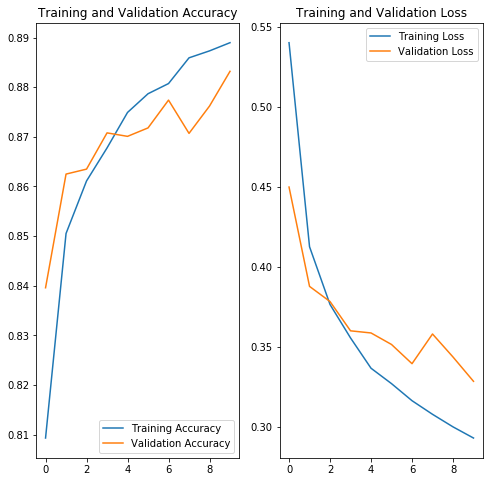

In [15]:
acc = clothing_history.history['accuracy']
val_acc = clothing_history.history['val_accuracy']

loss=clothing_history.history['loss']
val_loss=clothing_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

<h4>Progress Output</h4>
So now if you look at the graphs above you can see we actually achived a very accurate model with this very simple design due to the low complexity of the data. We can also see that over fitting is not a problem due to how close the training and validation values are to each other. This is a very accurate model.

<h3>Running Predictions Using The Clothing Dataset</h3>
To show an example of running predictions I will be using the Clothing Dataset. With this example what we will be doing as when a prediction is made we will retrieve the percentage probability that the prediction was apart of one of the classes of clothing and by graphing this we will be able to see which the model predicted to be the highest probability and thus its predicition.

To do this we must conctinate a softmax layer to our already trained model. What this does is convert the logits the model spits out from its predictions into an array of probability values representing our classes and the probability that it is each.

From this we will then graph these values with our class names and further be able to visualise our prediction.

For this example we will use our test images for the prediction.

We will create the plot_image and plot_value_array methods just for visualisation purposes.

And you can see that the predicted label shows up in red if its a bad prediction and blue if its correct.

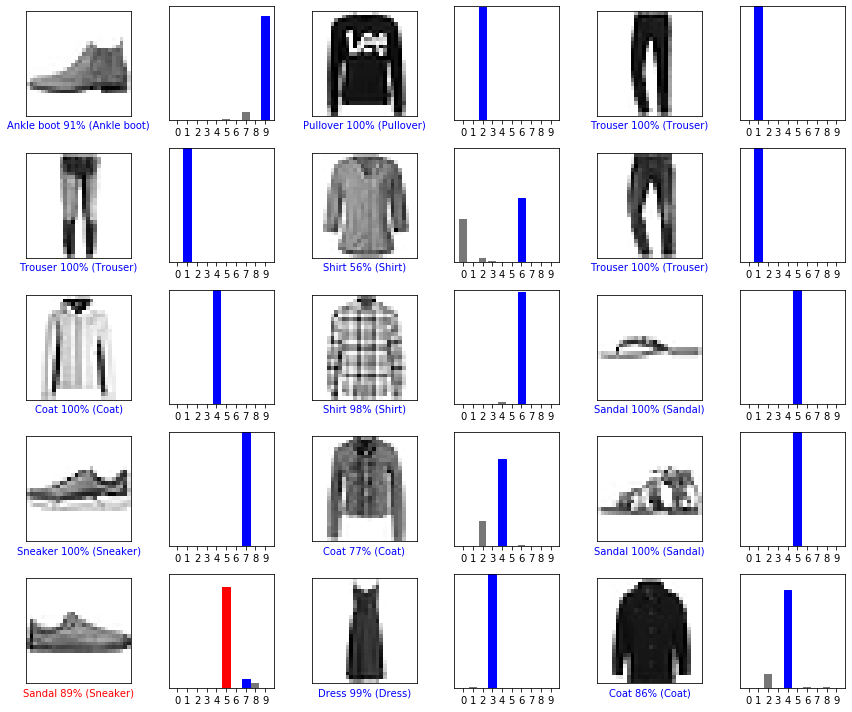

In [16]:
predictions_model = tf.keras.Sequential([clothing_model, 
                                         tf.keras.layers.Softmax()])

predictions = predictions_model.predict(clothing_test_images)

def clothing_plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(clothing_class_names[predicted_label],
                                100*np.max(predictions_array),
                                clothing_class_names[true_label]),
                                color=color)

def clothing_plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  clothing_plot_image(i, predictions[i], clothing_test_labels, clothing_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  clothing_plot_value_array(i, predictions[i], clothing_test_labels)
plt.tight_layout()
plt.show()

<h3>Putting All This Knowledge Together For One More Dataset</h3>
Now I will show you in one block of code how all the knowledge above can be implmented across a variety of use cases following the same classification as multiple classification, this will be on the hand written numbers datasets which can acquired bellow.

Total Numbers training images: 60000
Total Numbers testing images: 10000
Numbers Training Images Shape :  (28, 28)
AxesImage(54,36;334.8x217.44)
Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 3s 55us/sample - loss: 0.3108 - accuracy: 0.9105 - val_loss: 0.1479 - val_accuracy: 0.9552
Epoch 2/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1468 - accuracy: 0.9556 - val_loss: 0.1015 - val_accuracy: 0.9688
Epoch 3/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.1090 - accuracy: 0.9659 - val_loss: 0.0808 - val_accuracy: 0.9750
Epoch 4/10
60000/60000 [==============================] - 3s 52us/sample - loss: 0.0884 - accuracy: 0.9725 - val_loss: 0.0742 - val_accuracy: 0.9782
Epoch 5/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.0759 - accuracy: 0.9765 - val_loss: 0.0668 - val_accuracy: 0.9785
Epoch 6/10
60000/60000 [==============================] - 3s

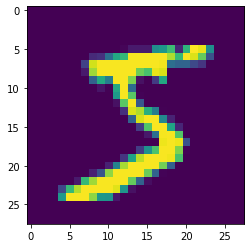

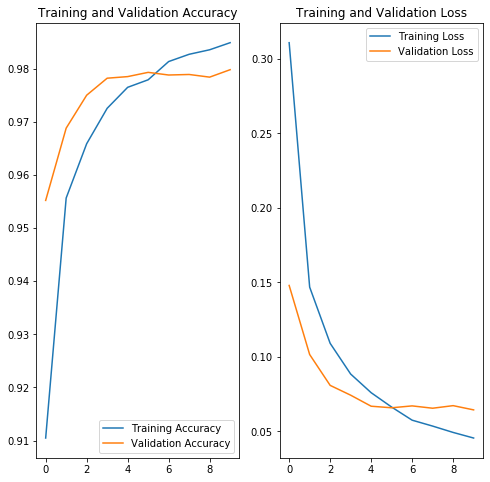

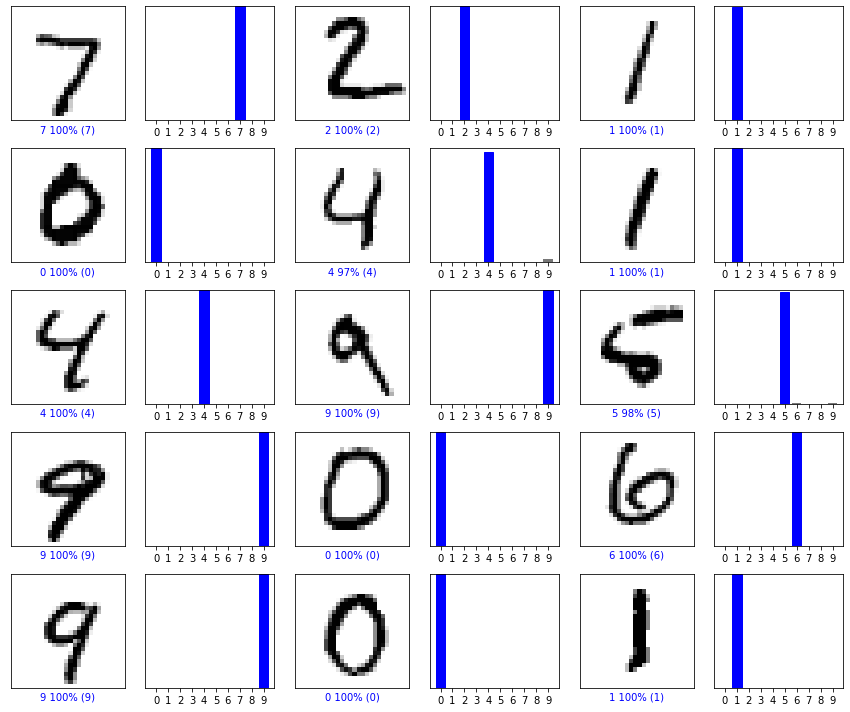

In [17]:
numbers_class_names = ['0','1','2','3','4','5','6','7','8','9']

numbers_mnist = keras.datasets.mnist

(numbers_train_images, numbers_train_labels), (numbers_test_images, numbers_test_labels) = numbers_mnist.load_data()

print("Total Numbers training images:", len(numbers_train_labels))
print("Total Numbers testing images:", len(numbers_test_labels))

numbers_train_images = numbers_train_images / 255
numbers_test_images = numbers_test_images / 255

np.expand_dims(numbers_train_images, axis=0)
np.expand_dims(numbers_test_images, axis=0)

print("Numbers Training Images Shape : " , numbers_train_images[0].shape) 
print(plt.imshow(numbers_train_images[0]))

numbers_model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dropout(0.2),
    
    Dense(128, activation='relu'),
    
    Dense(10)
])

numbers_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

numbers_history = numbers_model.fit(numbers_train_images,
                                      numbers_train_labels,
                                      epochs=10,
                                      validation_data=[numbers_test_images,numbers_test_labels])

acc = numbers_history.history['accuracy']
val_acc = numbers_history.history['val_accuracy']

loss=numbers_history.history['loss']
val_loss=numbers_history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

numbers_predictions_model = tf.keras.Sequential([numbers_model, 
                                         tf.keras.layers.Softmax()])

numbers_predictions = numbers_predictions_model.predict(numbers_test_images)

def numbers_plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(numbers_class_names[predicted_label],
                                100*np.max(predictions_array),
                                numbers_class_names[true_label]),
                                color=color)

def numbers_plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  numbers_plot_image(i, numbers_predictions[i], numbers_test_labels, numbers_test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  numbers_plot_value_array(i, numbers_predictions[i], numbers_test_labels)
plt.tight_layout()
plt.show()